# Project 4, APS1070 Fall 2023
#### **Linear Regression -  14 points**
**Deadline: Dec 1st, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Jingjing Liu
*   Your **student number**: 1006103823

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files for this notebook on Quercus for grading.


Ref: https://stackoverflow.com/a/64487858

## Part 1 - Getting Started [2 marks]

In this project, we are going to design a mathematical model that predicts the number of shares on social networks.

For this purpose, we are going to use a dataset containing 39,644 instances, where each instance is a set of 61 heterogeneous features about articles published by Mashable in a period of two years. Our goal is to use these features to predict the `shares` column, which is the number of shares of an article in social networks. We will make our predictions by implementing linear regression.

The dataset has been sourced from the Machine Learning Repository of University of California, Irvine [Online News Popularity Data Set (UC Irvine)](https://archive.ics.uci.edu/dataset/332/online+news+popularity).
The UCI page mentions the following publication as the original source of the data set:

*K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal*

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/Sabaae/Dataset/main/Online_News_Popularity.csv',
    index_col=0
)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[1.5]**
*   Using `train_test_split` from Sklearn, split the dataset into training and validation sets ($80\%$ training, $20\%$ validation). When splitting, set `random_state=1`. **[0.5]**
*   Keep the numerical features only. Then, standardize the data **manually** according to the same method as `StandardScaler` from sklearn, but you may not directly use `StandardScaler'. **[0.5]**
*   Insert a first column of all $1$s in both the training and validation data sets.**[0.5]**
3. Explain why we should not insert the column of $1$s prior to standardization. **[0.5]**

# 1. Print the dataframe.

In [ ]:
print(df)

                                             article_url  timedelta  \
0                           amazon-instant-video-browser      731.0   
1                            ap-samsung-sponsored-tweets      731.0   
2                         apple-40-billion-app-downloads      731.0   
3                               astronaut-notre-dame-bcs      731.0   
4                                       att-u-verse-apps      731.0   
...                                                  ...        ...   
39639                                 samsung-app-autism        8.0   
39640  seth-rogen-james-franco-will-live-tweet-the-in...        8.0   
39641                              son-pays-off-mortgage        8.0   
39642                                     ukraine-blasts        8.0   
39643                              youtube-channels-2015        8.0   

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                12.0             219.0         0.663594             

In [ ]:
df.head()

,article_url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,amazon-instant-video-browser,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,ap-samsung-sponsored-tweets,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,apple-40-billion-app-downloads,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,astronaut-notre-dame-bcs,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,att-u-verse-apps,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# 2. Prepare the dataset

In [ ]:
#  Keep the numerical features only

# Select only the numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# create a new DataFrame with only the numerical features
df_numerical = df[numerical_features.columns]

df = df_numerical.copy()

df

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [ ]:
# (1) split the dataset into training and validation

from sklearn.model_selection import train_test_split

y = df['shares'].values
X = df.drop('shares', axis = 1).values

X_train, X_val, y_train, y_val = 0, 0, 0, 0

# sets ( 80%  training,  20%  validation).

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=1)



In [ ]:
# (2) b. standardize the data manually

# Calculate mean and standard deviation for each feature in the training set
mean_values = np.mean(X_train, axis=0)
std_dev_values = np.std(X_train, axis=0)

# Standardize the training set
X_train_standardized = (X_train - mean_values) / std_dev_values

# Use the mean and standard deviation from the training set to standardize the validation set
X_val_standardized = (X_val - mean_values) / std_dev_values



X_train_standardized

array([[ 1.23135517, -0.18805827, -0.62073397, ..., -0.27125578,
         0.84064998, -0.69126839],
       [ 1.39953911, -0.18805827, -0.34290123, ..., -0.27125578,
         0.84064998, -0.69126839],
       [ 0.15684662, -0.18805827,  0.53900726, ...,  1.36560858,
        -0.57127969,  1.22921705],
       ...,
       [ 1.32479069,  0.75805024, -0.84173729, ..., -0.27125578,
         0.31117635, -0.69126839],
       [ 0.67074201,  0.28499598, -0.85857564, ...,  0.3331249 ,
        -1.59492871,  0.01783393],
       [-1.13256363, -0.66111252,  0.55163602, ..., -0.27125578,
         0.84064998, -0.69126839]])

In [ ]:
# (2) c. Insert the first column of all  1 s in the training, validation, and test set.

X_train_standardized_with_1 = np.column_stack([np.ones((len(X_train_standardized),1)),X_train_standardized])
X_val_standardized_with_1 = np.column_stack([np.ones((len(X_val_standardized),1)),X_val_standardized])

X_val_standardized_with_1

array([[ 1.        , -0.69808844,  0.75805024, ...,  0.29535111,
        -1.67434975, -0.02648497],
       [ 1.        ,  1.58173839, -0.18805827, ..., -0.27125578,
         0.31117635, -0.69126839],
       [ 1.        ,  0.06808287,  1.23110449, ...,  0.25487919,
        -1.18269567, -0.0739695 ],
       ...,
       [ 1.        , -0.8429135 , -0.66111252, ..., -0.27125578,
         0.84064998, -0.69126839],
       [ 1.        , -1.42221376,  0.28499598, ..., -0.27125578,
         0.84064998, -0.69126839],
       [ 1.        , -1.32410646,  1.23110449, ..., -0.27125578,
         0.84064998, -0.69126839]])

# 3. Explain why we should not insert the column of  1 s prior to standardization

Inserting a column of 1s before standardization can have an impact on the interpretation of the standardization process and the subsequent model.  If we insert a column of 1s before standardization, the mean of that column is 1. When you subtract 1 from each value in that column, you end up with a column of zeros, which defeats the purpose of standardization.



## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the inversion, as numpy.linalg.inv may caue an error.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [ ]:
from sklearn.metrics import mean_squared_error
import scipy as scipy

# Implement the direct solution
W = np.dot(scipy.linalg.inv(np.dot(X_train_standardized_with_1.T, X_train_standardized_with_1)), np.dot(X_train_standardized_with_1.T, y_train)).reshape(-1,1)

## Prediction

y_pred_train = np.dot(X_train_standardized_with_1, W)
y_pred_val = np.dot(X_val_standardized_with_1, W)

# Report the root-mean-square error (RMSE)
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

RMSE_train = rmse(y_pred_train, y_train)
RMSE_val = rmse(y_pred_val, y_val)

print("The root-mean-square error (RMSE) for training set is", RMSE_train)
print("The root-mean-square error (RMSE) for validation set is", RMSE_val)



The root-mean-square error (RMSE) for training set is 12166.03665232997
The root-mean-square error (RMSE) for validation set is 8266.782865779363


## Part 3 - Full Batch Gradient Descent [4 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data.

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges.

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you calculated in the previous part.

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).
  Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[1]**

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[1]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

* Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[0.5]**

In [ ]:
import time
start_time = time.time() ## Records current time
np.random.seed(2)

## GD Script -- Sample code in tutorial! ##


threshold  = RMSE_val*1.001 # Convergence threshold
lr  = 0.01 # learning rate
w = np.random.uniform(high=0.001, size=60)
y_train = y_train.reshape(-1,1)

rmses_train,rmses_val = [],[]
for epoch in range (0, 1000):
    ypred_train = np.dot(X_train_standardized_with_1,w.T).reshape (-1,1)
    rmses_train.append(rmse(ypred_train,y_train))
    gradient = (1/len(ypred_train) * np.dot(X_train_standardized_with_1.T, ypred_train-y_train)).reshape(1,-1)
    w = w - lr * gradient
    ypred_val = np.dot(X_val_standardized_with_1, w.T)
    rmses_val.append(rmse(ypred_val,y_val))
    if rmse(ypred_val,y_val) <= threshold:
         break


print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

--- Total Training Time: 2.929116725921631 (s) ---


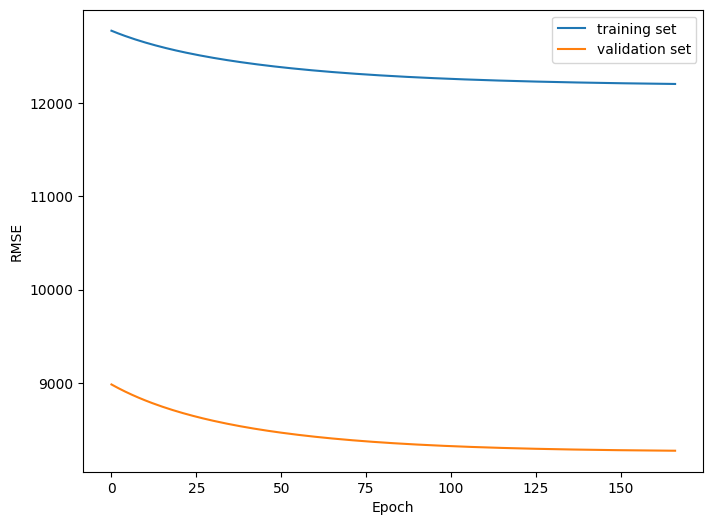

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(rmses_train, label ="training set")
plt.plot(rmses_val, label = "validation set")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()

# Comment on overfitting/underfitting by observing the training and validation RMSE

Since the training RMSE curve is much higher than the validation RMSE curve, it is a clear indication of overfitting.

# Explain the difference between epoch and iteration in the Gradient descent algorithm

 An epoch represents one complete pass through the entire dataset, while an iteration represents one update of the model parameters using a subset of the data. The number of iterations per epoch depends on the batch size used in the optimization algorithm.

In [ ]:
y_train.shape

(31715, 1)

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are:
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays:
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes:
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged.
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`.

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [ ]:
def MiniBatch_Stochastic_GD(X_train, y_train, X_val, y_val, batch_size, learning_rate, convergence_threshold):

  # Initialize weights randomly
  w = np.random.uniform(0, 0.001, X_train.shape[1])

  # Initial RMSE on validation set
  rmse_val_cur = convergence_threshold + 1

  # Initialize lists to store results
  weight = []
  rmse_train = []
  rmse_val = []
  elapsed_time = []


  # Parameter initialization
  start_time = time.time()
  flag = True   # if RMSE gets larger, break the loop and stop training
  epoch = 0


  while flag and rmse_val_cur > convergence_threshold:
    for counter in range(0, len(X_train), batch_size):
      X_train_batch = X_train[counter:counter + batch_size]
      y_train_batch = y_train[counter:counter + batch_size]

      # Compute predictions and gradient
      y_batch_predict = np.dot(X_train_batch, w.T)
      gradient = (np.dot(X_train_batch.T, y_batch_predict - y_train_batch))/len(y_batch_predict)

      # Update weights using gradient descent
      w = w - learning_rate * gradient

    # Calculate RMSE on training set
    y_train_predict = np.dot(X_train, w.T)
    rmse_train_cur = rmse(y_train_predict, y_train)

    # Calculate RMSE on validation set
    y_val_predict = np.dot(X_val, w.T)
    rmse_val_cur = rmse(y_val_predict, y_val)


    # Check if RMSE gets larger
    if epoch > 0:
      if rmse_val_cur > rmse_val[-1]:
        flag = False
        print('Model diverges with batch size ', batch_size,'learning rate',learning_rate)
        break;


    # append rmse

    rmse_train.append(rmse_train_cur)
    rmse_val.append(rmse_val_cur)


    # Calculate  time
    total_time = time.time() - start_time
    elapsed_time.append(total_time)

    # get weight
    weight.append(w)

    permutation = list(np.random.permutation(len(X_train)))
    X_train = X_train[permutation]
    y_train = y_train[permutation]

    epoch += 1



  final_w = weight[-1]

  return final_w, rmse_train, rmse_val, elapsed_time

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
batch_sizes = [2,4,8,16,32,64,128,256]
learning_rate = 0.01

for batch_size in batch_sizes:
  MiniBatch_Stochastic_GD(X_train_standardized_with_1, y_train, X_val_standardized_with_1, y_val, batch_size, 0.01, 8275.049648645141)



Model diverges with batch size  2 learning rate 0.01
Model diverges with batch size  4 learning rate 0.01
Model diverges with batch size  8 learning rate 0.01
Model diverges with batch size  16 learning rate 0.01
Model diverges with batch size  32 learning rate 0.01
Model diverges with batch size  64 learning rate 0.01
Model diverges with batch size  128 learning rate 0.01


In [ ]:
batch_sizes = [256,512,1024,2048,4096]



results = {}
for batch_size in batch_sizes:
  weights, training_rmse, validation_rmse, elapsed_time = MiniBatch_Stochastic_GD(X_train_standardized_with_1, y_train, X_val_standardized_with_1, y_val, batch_size, 0.01, 8275.049648645141)
  results[batch_size] = {
      'weights': weights,
      'training_rmse': training_rmse,
      'validation_rmse': validation_rmse,
      'elapsed_time': elapsed_time
  }

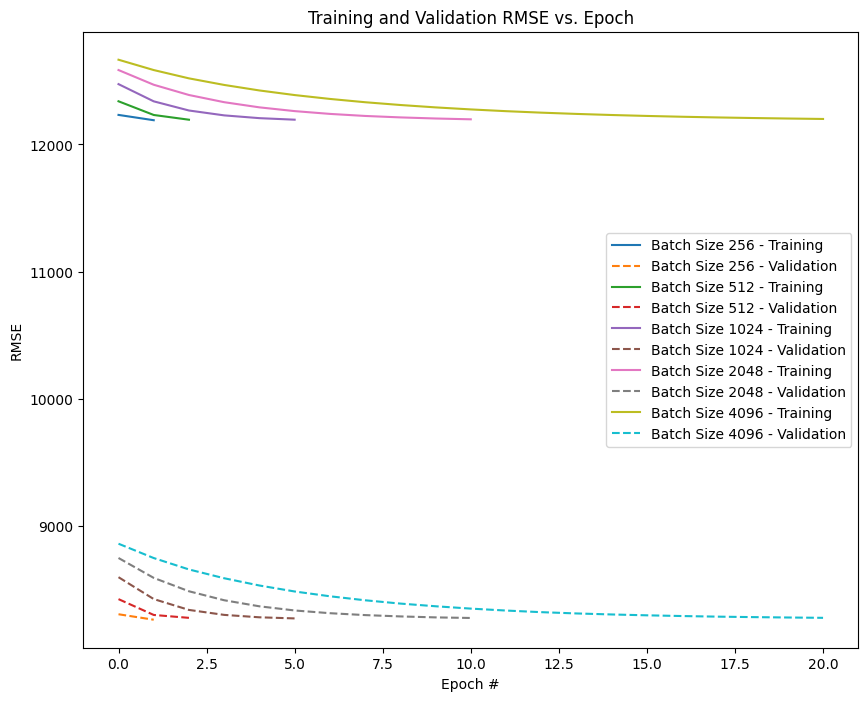

In [ ]:
# Plot training and validation RMSE vs. epoch
plt.figure(figsize=(10, 8))
for batch_size, result in results.items():
    plt.plot(np.arange(len(result['training_rmse'])), result['training_rmse'], label=f'Batch Size {batch_size} - Training')
    plt.plot(np.arange(len(result['validation_rmse'])), result['validation_rmse'], label=f'Batch Size {batch_size} - Validation', linestyle='dashed')
plt.xlabel('Epoch #')
plt.ylabel('RMSE')
plt.title('Training and Validation RMSE vs. Epoch')
plt.legend()

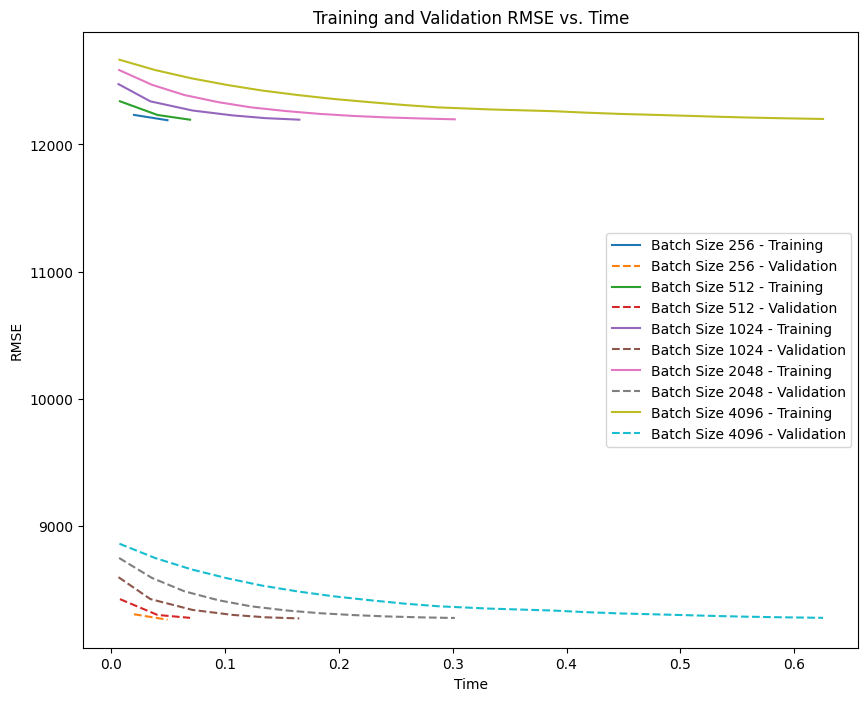

In [ ]:
# Plot training and validation RMSE vs. time
plt.figure(figsize=(10, 8))
for batch_size, result in results.items():
    plt.plot(result['elapsed_time'], result['training_rmse'], label=f'Batch Size {batch_size} - Training')
    plt.plot(result['elapsed_time'], result['validation_rmse'], label=f'Batch Size {batch_size} - Validation', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('RMSE')
plt.title('Training and Validation RMSE vs. Time')
plt.legend()

Text(0.5, 1.0, 'Batch Size vs Total Training Time')

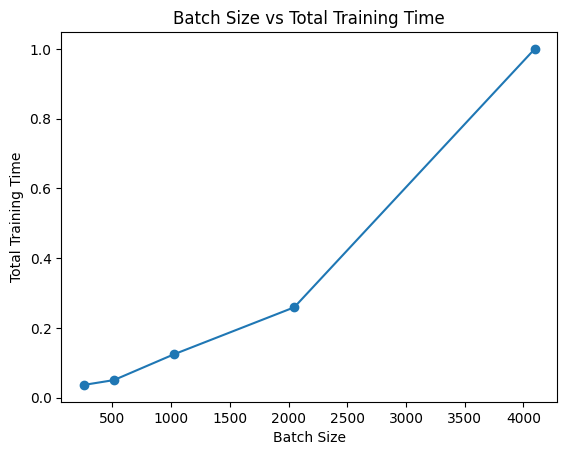

In [ ]:
# Plot Total training time vs. Batch size
batch_sizes = [256,512,1024,2048,4096] # only plot converge model here
total_time_array = []

for batch_size in batch_sizes:
    weights, training_rmse, validation_rmse, elapsed_time = MiniBatch_Stochastic_GD(X_train_standardized_with_1, y_train, X_val_standardized_with_1, y_val, batch_size, 0.01, 8275.049648645141)
    total_time_array.append(elapsed_time[-1])

plt.plot([256,512,1024,2048,4096], total_time_array, marker='o')
plt.plot()
plt.xlabel('Batch Size')
plt.ylabel('Total Training Time')
plt.title('Batch Size vs Total Training Time')


# Describe your findings, including the main takeaways from each of your plots.





* Mini-Batch Gradient Descent graph: RMSE vs # of Epoch

The analysis of Mini-Batch Gradient Descent graphs reveals that the model's convergence rate is influenced by the choice of batch size. Smaller mini-batch sizes result in faster convergence, while larger sizes lead to slower convergence. This behavior is attributed to the introduction of more noise in smaller batch sizes, aiding in escaping suboptimal local minima and guiding the model towards better solutions. As a consequence, models with smaller batch sizes require fewer iterations and epochs.



*   Mini-Batch Gradient Descent graph: RMSE vs Time

when considering the relationship between RMSE and time, models with smaller batch sizes demonstrate quicker convergence due to the noise effect, resulting in reduced training times compared to larger batch sizes.

*  Batch size vs Total training time graph

The total training time graph further supports this trend, showing an increase in training time as the batch size grows. Notably, the optimal batch size for minimizing training time is identified as 256.








## Part 5 - Gradient Descent Learning Rate [3 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batch sizes that do not converge with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batch size. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[1]**

2. Select the best batch size based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD.
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[1]**

# 1.

In [ ]:
#batch_size = 8

lr = [ 0.00001, 0.0001, 0.001, 0.01, 0.1]
for learning_rates in lr:
    weights, training_rmse, validation_rmse, elapsed_time = MiniBatch_Stochastic_GD(X_train_standardized_with_1, y_train, X_val_standardized_with_1, y_val, 8, learning_rates, 8275.049648645141)



Model diverges with batch size  8 learning rate 0.001
Model diverges with batch size  8 learning rate 0.01
Model diverges with batch size  8 learning rate 0.1


we can see that the learning rate of 0.00001 and 0.0001  can result in convergence for  batch size 8

we pick 0.0001 as the learning rate

In [ ]:
RMSE_train_for_picked_lr_8=[]
RMSE_val_for_picked_lr_8=[]
weights, training_rmse, validation_rmse, elapsed_time = MiniBatch_Stochastic_GD(X_train_standardized_with_1, y_train, X_val_standardized_with_1, y_val, 8, 0.0001, 8275.049648645141)
RMSE_train_for_picked_lr_8.append(training_rmse)
RMSE_val_for_picked_lr_8.append(validation_rmse)

print(RMSE_train_for_picked_lr_8)

[[12428.459507370737, 12293.715401026575, 12233.486753114068, 12205.414969385316, 12191.958548563462]]


In [ ]:
#batch_size = 32

lr = [ 0.00001, 0.0001, 0.001, 0.01, 0.1]
for learning_rates in lr:
    weights, training_rmse, validation_rmse, elapsed_time = MiniBatch_Stochastic_GD(X_train_standardized_with_1, y_train, X_val_standardized_with_1, y_val, 32, learning_rates, 8275.049648645141)


Model diverges with batch size  32 learning rate 0.01
Model diverges with batch size  32 learning rate 0.1


we can see that the learning rate of 0.00001 , 0.0001 and 0.001 can result in convergence for batch size 32

we pick 0.001 as the learning rate

In [ ]:
RMSE_train_for_picked_lr_32=[]
RMSE_val_for_picked_lr_32=[]
weights, training_rmse, validation_rmse, elapsed_time = MiniBatch_Stochastic_GD(X_train_standardized_with_1, y_train, X_val_standardized_with_1, y_val, 32, 0.0001, 8275.049648645141)
RMSE_train_for_picked_lr_32.append(training_rmse)
RMSE_val_for_picked_lr_32.append(validation_rmse)

In [ ]:
#batch_size = 64

lr = [ 0.00001, 0.0001, 0.001, 0.01, 0.1]
for learning_rates in lr:
    weights, training_rmse, validation_rmse, elapsed_time = MiniBatch_Stochastic_GD(X_train_standardized_with_1, y_train, X_val_standardized_with_1, y_val, 64, learning_rates, 8275.049648645141)


Model diverges with batch size  64 learning rate 0.01
Model diverges with batch size  64 learning rate 0.1


we can see that the learning rate of 0.00001 , 0.0001 and 0.001 can result in convergence for batch size 64

we pick 0.001 as the learning rate

In [ ]:
RMSE_train_for_picked_lr_64=[]
RMSE_val_for_picked_lr_64=[]
weights, training_rmse, validation_rmse, elapsed_time = MiniBatch_Stochastic_GD(X_train_standardized_with_1, y_train, X_val_standardized_with_1, y_val, 64, 0.0001, 8275.049648645141)
RMSE_train_for_picked_lr_64.append(training_rmse)
RMSE_val_for_picked_lr_64.append(validation_rmse)

In [ ]:
pip install PrettyTable

In [ ]:

from prettytable import PrettyTable

# Create a table object
table = PrettyTable()

# Define the table columns
table.field_names = ["batch_size", "learning rate", "training RMSE", "validation RMSE"]

# Add rows to the table
table.add_row(["8", 0.0001, RMSE_train_for_picked_lr_8, RMSE_val_for_picked_lr_8])
table.add_row(["32", 0.001, RMSE_train_for_picked_lr_32, RMSE_val_for_picked_lr_32])
table.add_row(["64", 0.001, RMSE_train_for_picked_lr_64, RMSE_val_for_picked_lr_64])

# Print the table
print(table)

+------------+---------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# 2.

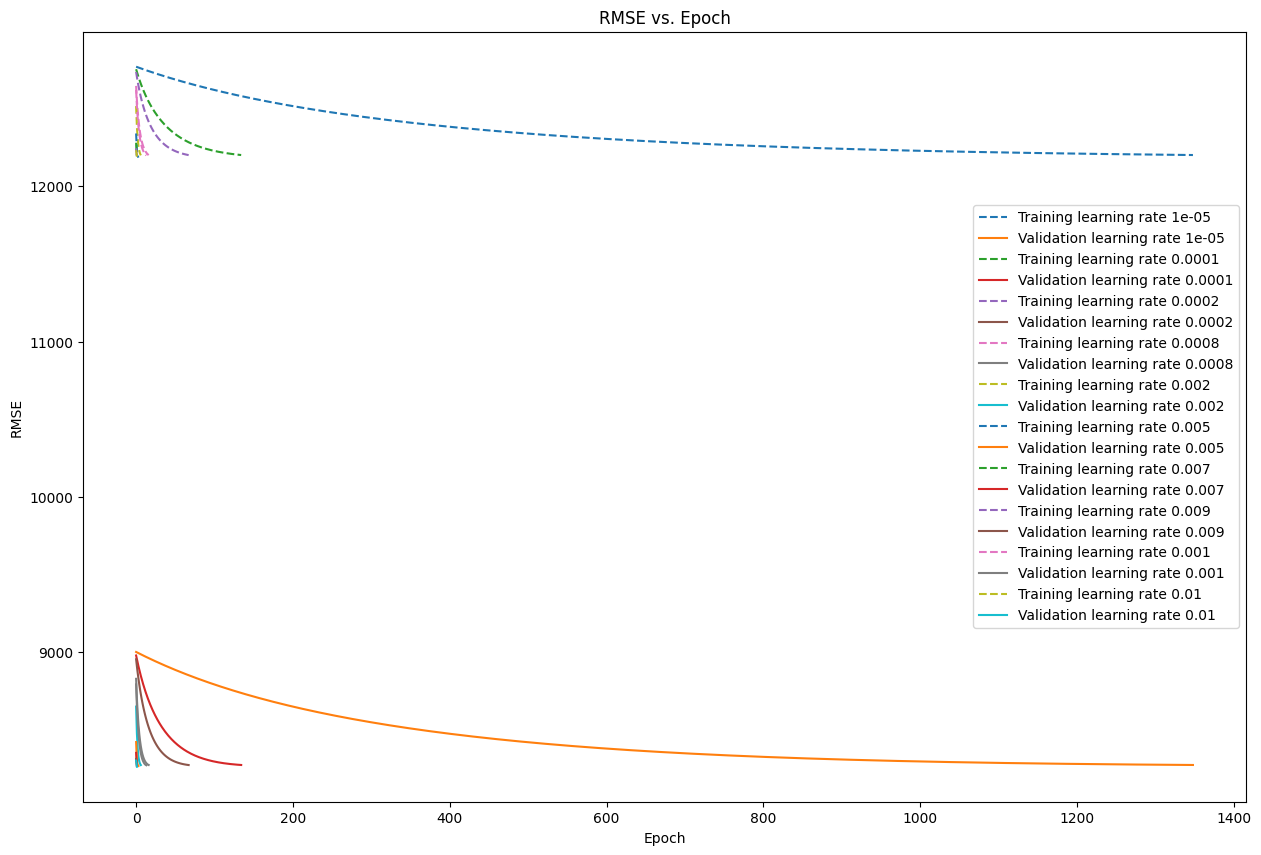

In [ ]:
# the best batch size is 256 based on part 4

lr=[0.00001,0.0001,0.0002,0.0008,0.002,0.005,0.007,0.009,0.001,0.01]
plt.figure(figsize=(15, 10))
for learning_rates in lr:
    weights, training_rmse, validation_rmse, elapsed_time = MiniBatch_Stochastic_GD(X_train_standardized_with_1, y_train, X_val_standardized_with_1, y_val, 256, learning_rates, 8275.049648645141)
    plt.title('RMSE vs. Epoch')
    plt.plot(range(len(training_rmse)), training_rmse, label = 'Training learning rate {}'.format(learning_rates), linestyle = 'dashed')
    plt.plot(range(len(validation_rmse)), validation_rmse, label = 'Validation learning rate {}'.format(learning_rates))
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.legend()

Model diverges with batch size  256 learning rate 0.007


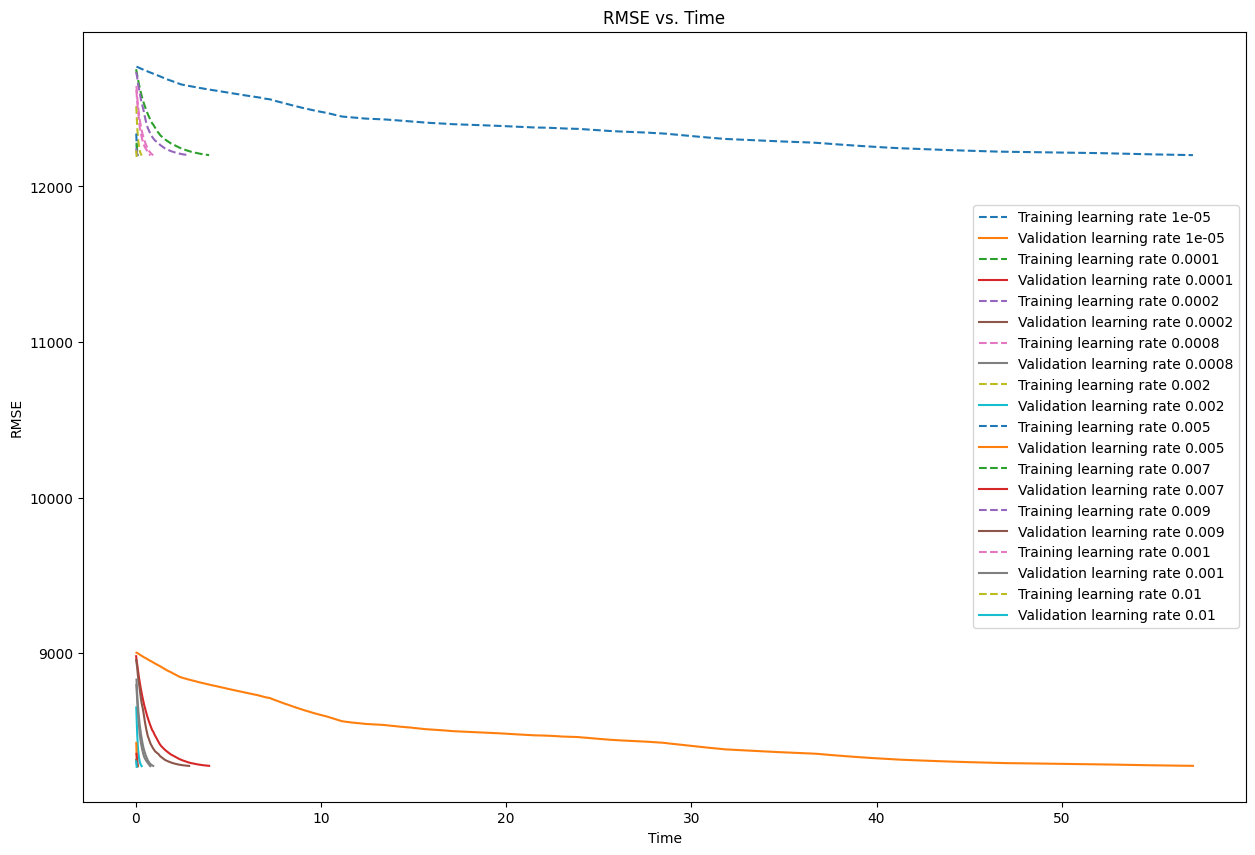

In [ ]:
lr=[0.00001,0.0001,0.0002,0.0008,0.002,0.005,0.007,0.009,0.001,0.01]
plt.figure(figsize=(15, 10))
for learning_rates in lr:
  weights, training_rmse, validation_rmse, elapsed_time = MiniBatch_Stochastic_GD(X_train_standardized_with_1, y_train, X_val_standardized_with_1, y_val, 256, learning_rates, 8275.049648645141)
  plt.title('RMSE vs. Time')
  plt.plot(elapsed_time, training_rmse, label = 'Training learning rate {}'.format(learning_rates), linestyle = 'dashed')
  plt.plot(elapsed_time, validation_rmse, label = 'Validation learning rate {}'.format(learning_rates))
  plt.xlabel('Time')
  plt.ylabel('RMSE')
  plt.legend()

# Describe your findings, including the main takeaways from each of your plots.



The analysis of graphs depicting the relationship between learning rate and performance metrics reveals distinct patterns. In the "RMSE vs # of Epoch" graph, it is observed that models with larger learning rates exhibit fewer epochs, while models with smaller learning rates require a larger number of epochs. The explanation lies in the fact that smaller learning rates result in smaller changes to weights in each update, necessitating more epochs for convergence. Conversely, larger learning rates induce more significant changes to weights, leading to faster convergence with fewer epochs.

In the "Time vs # of Epoch" graph, it becomes apparent that models with larger learning rates converge more quickly, requiring less time, whereas models with smaller learning rates take longer to converge. The underlying logic is that larger learning rates introduce more substantial changes to weights in each update, thereby extending the convergence time. On the other hand, smaller learning rates, with their more modest weight adjustments, facilitate quicker convergence and reduced overall training time.

In [ ]:
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to html APS1070_Project_4.ipynb

[NbConvertApp] Converting notebook APS1070_Project_4.ipynb to html
[NbConvertApp] Writing 1266711 bytes to APS1070_Project_4.html
